In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive, IntSlider
import  os
from sklearn.preprocessing import StandardScaler
import time
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import model_selection, ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

D:\tools\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
dir_path=r'./data'

In [3]:
RF = joblib.load("./models_save/RF_train_model.m")

In [4]:
def import_data(path):
    imdict = {}
    for file in os.listdir(path):
        imdict[file[:-4]] = pd.read_csv(path+r'\\'+file,low_memory = False)
    return imdict

In [5]:
data = pd.read_csv(dir_path+'\\LoanStats_securev1_2018Q1.csv',low_memory = False,skiprows = 1)

In [6]:
cate_list = list(data.select_dtypes(include='object').columns)
conti_list = list(data.select_dtypes(include='float64').columns)

In [7]:
def table_cate(df,col):
    t = pd.pivot_table(df[[col, 'loan_status']], index=col, columns=['loan_status'], aggfunc=len)
    t['ratio'] = t['Charged Off'].values / (t['Current'].values + t['Charged Off'].values+t['Fully Paid'].values)
    t = t.sort_values(by = 'ratio',ascending=False)
    return t

In [8]:
def plot_cate(df,col_list):
    for name in col_list:
        p = pd.pivot_table(df[[name, 'loan_status']], index=df[name], columns=['loan_status'], aggfunc=len)
        p.plot(kind='bar')

In [9]:
def plot_conti(df,col):
    plt.hist(df[df.loan_status=='Fully Paid'].loc[:, col], color='green')
    plt.hist(df[df.loan_status=='Charged Off'].loc[:, col],color='red')
    plt.title(col)
    plt.legend(['good', 'bad'])

In [10]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107866 entries, 0 to 107865
Columns: 150 entries, id to settlement_term
dtypes: float64(112), object(38)
memory usage: 123.4+ MB


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,desc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,107864.000000,107864.000000,107864.000000,107864.000000,1.078640e+05,0.0,107602.000000,107864.000000,107864.000000,...,456.0,456.000000,456.0,456.000000,346.000000,456.000000,456.000000,738.000000,738.000000,738.000000
mean,NaN,16147.942780,16147.942780,16143.858212,469.644525,7.854227e+04,NaN,19.648209,0.223773,708.248303,...,3.0,191.303399,3.0,14.440789,584.158526,14753.860197,213.719518,6821.027981,51.209472,18.186992
std,NaN,10184.024938,10184.024938,10182.885624,289.217018,7.687436e+04,NaN,21.795902,0.730417,37.205453,...,0.0,142.258457,0.0,8.215023,437.653062,8731.149932,192.171225,4534.557644,7.978391,6.837739
min,NaN,1000.000000,1000.000000,1000.000000,29.760000,0.000000e+00,NaN,0.000000,0.000000,660.000000,...,3.0,7.910000,3.0,0.000000,23.730000,574.950000,0.080000,307.000000,29.950000,1.000000
25%,NaN,8000.000000,8000.000000,8000.000000,254.560000,4.500000e+04,NaN,11.230000,0.000000,680.000000,...,3.0,84.330000,3.0,8.000000,254.527500,7612.462500,63.390000,3436.250000,45.000000,16.000000
50%,NaN,14000.000000,14000.000000,14000.000000,389.360000,6.500000e+04,NaN,17.670000,0.000000,700.000000,...,3.0,156.015000,3.0,15.000000,484.290000,13123.370000,161.335000,5596.735000,50.000000,18.000000
75%,NaN,22400.000000,22400.000000,22375.000000,637.630000,9.500000e+04,NaN,25.020000,0.000000,730.000000,...,3.0,262.232500,3.0,21.000000,800.265000,21524.325000,317.015000,9406.830000,60.000000,24.000000
max,NaN,40000.000000,40000.000000,40000.000000,1618.030000,8.365188e+06,NaN,999.000000,20.000000,845.000000,...,3.0,845.220000,3.0,30.000000,2535.660000,38079.560000,1072.990000,23086.000000,80.000000,30.000000


In [11]:
data.loan_status.value_counts()

Current               69654
Fully Paid            27322
Charged Off            7619
Late (31-120 days)     2077
In Grace Period         773
Late (16-30 days)       416
Default                   3
Name: loan_status, dtype: int64

In [12]:
table_cate(data,'purpose')

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),ratio
purpose,,,,,,,,
small_business,171.0,854.0,NaN,262.0,15.0,5.0,39.0,0.132867
moving,85.0,444.0,NaN,190.0,9.0,NaN,17.0,0.118220
renewable_energy,7.0,40.0,NaN,16.0,NaN,NaN,NaN,0.111111
medical,159.0,1097.0,NaN,462.0,12.0,5.0,30.0,0.092549
house,127.0,960.0,NaN,441.0,6.0,9.0,36.0,0.083115
other,775.0,6087.0,1.0,2560.0,74.0,39.0,198.0,0.082254
major_purchase,252.0,2010.0,NaN,838.0,29.0,12.0,76.0,0.081290
debt_consolidation,4108.0,35123.0,2.0,14128.0,394.0,238.0,1090.0,0.076988
vacation,53.0,459.0,NaN,224.0,4.0,1.0,8.0,0.072011


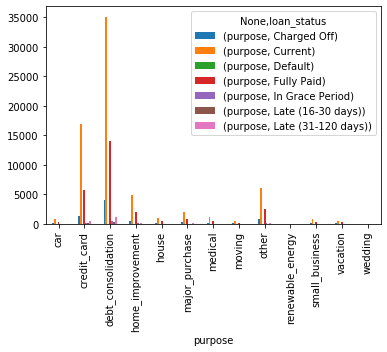

In [13]:
plot_cate(data,['purpose'])

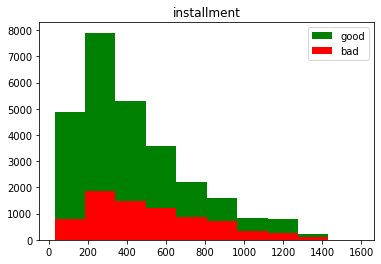

In [14]:
plot_conti(data,'installment')

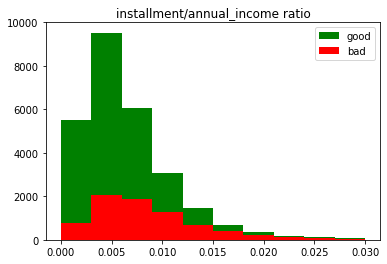

In [15]:
test_data = data.loc[data['annual_inc'] != 0]

x1 = test_data[test_data.loan_status=='Fully Paid'].loc[:, 'installment']/test_data[test_data.loan_status=='Fully Paid'].loc[:, 'annual_inc']
x2 = test_data[test_data.loan_status=='Charged Off'].loc[:, 'installment']/test_data[test_data.loan_status=='Charged Off'].loc[:, 'annual_inc']
plt.hist(x1,color = 'green',range = (0,0.03))
plt.hist(x2,color = 'red',range = (0,0.03))
plt.title('installment/annual_income ratio')
plt.legend(['good', 'bad'])

NULL

In [16]:
def null_check(df,coltype,top):
    target_cols = df.select_dtypes(include=coltype).columns
    return(((df[target_cols].isnull().sum()/df.shape[0]).sort_values(ascending=False))[:top],)

In [17]:
null_check(data,['object'],20)

(hardship_loan_status         0.995773
 payment_plan_start_date      0.995773
 hardship_end_date            0.995773
 hardship_start_date          0.995773
 hardship_status              0.995773
 hardship_reason              0.995773
 hardship_type                0.995773
 settlement_date              0.993158
 debt_settlement_flag_date    0.993158
 settlement_status            0.993158
 verification_status_joint    0.851510
 sec_app_earliest_cr_line     0.848599
 next_pymnt_d                 0.323948
 emp_title                    0.089138
 emp_length                   0.087423
 last_pymnt_d                 0.001409
 revol_util                   0.001400
 last_credit_pull_d           0.000028
 issue_d                      0.000019
 term                         0.000019
 dtype: float64,)

In [18]:
data_clean = data.drop(columns=['member_id', 'desc'])

In [19]:
hardship_related_cols = ['hardship_flag','hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount'\
                         ,'hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd'\
                         ,'hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount'\
                         ,'hardship_last_payment_amount','debt_settlement_flag','debt_settlement_flag_date'\
                         ,'settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term']
data_clean = data_clean.drop(columns=hardship_related_cols)

In [20]:
data_clean = data_clean.loc[~data_clean['application_type'].isnull()]
data_ind_c = data_clean.loc[data_clean['application_type'] =='Individual']

In [21]:
joint_related_cols = ['sec_app_earliest_cr_line','verification_status_joint','sec_app_mths_since_last_major_derog'\
                      ,'sec_app_inq_last_6mths','sec_app_collections_12_mths_ex_med','annual_inc_joint'\
                      ,'dti_joint','revol_bal_joint','sec_app_fico_range_high','sec_app_fico_range_low','sec_app_mort_acc'\
                      ,'sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il'\
                      ,'sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','mths_since_last_record']
data_ind_c = data_ind_c.drop(columns=joint_related_cols)

In [22]:
data_ind_c = data_ind_c.drop(columns=['next_pymnt_d'])
data_ind_c['emp_title'].loc[data_ind_c['emp_title'].isnull()] = 'no data'
data_ind_c['emp_length'].loc[data_ind_c['emp_length'].isnull()] = 'no data'
last_event_cols = ['mths_since_last_major_derog','mths_since_recent_bc_dlq','mths_since_recent_revol_delinq','mths_since_last_delinq'\
            ,'mths_since_recent_inq','mths_since_rcnt_il','mths_since_recent_bc']
for var in last_event_cols:
    data_ind_c[var].loc[data_ind_c[var].isnull()] = -1

D:\tools\anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
data_ind_c['il_util'].loc[(data_ind_c['num_il_tl']!=0) & (data_ind_c['il_util'].isnull())] =\
data_ind_c['il_util'].loc[(data_ind_c['num_il_tl']!=0)].mean()
data_ind_c['il_util'].loc[data_ind_c['num_il_tl']==0] = 0
data_ind_c['bc_util'].loc[(data_ind_c['num_bc_tl']!=0) & (data_ind_c['bc_util'].isnull())] = \
data_ind_c['bc_util'].loc[(data_ind_c['num_bc_tl']!=0)].mean()
data_ind_c['bc_util'].loc[data_ind_c['num_bc_tl']==0] = 0
data_ind_c['percent_bc_gt_75'].loc[(data_ind_c['num_bc_tl']!=0) & (data_ind_c['percent_bc_gt_75'].isnull())] = \
data_ind_c['percent_bc_gt_75'].loc[(data_ind_c['num_bc_tl']!=0)].mean()
data_ind_c['percent_bc_gt_75'].loc[data_ind_c['num_bc_tl']==0] = 0
data_ind_c['bc_open_to_buy'].loc[(data_ind_c['bc_open_to_buy'].isnull())] = data_ind_c['bc_open_to_buy'].mean()
data_ind_c['mo_sin_old_il_acct'].loc[data_ind_c['num_il_tl']==0] = -1

In [24]:
data_ind_c = data_ind_c.drop(columns=['num_tl_120dpd_2m'])
data_ind_c.dropna(axis=0, how='any', inplace=True)

SPLIT

In [25]:
obj_cols = []
float_cols = []

for col in data_ind_c.columns:
    if (data_ind_c[col].dtypes == 'O') and (col != 'loan_status'):
        obj_cols.append(col)
    if data_ind_c[col].dtypes == 'float64':
        float_cols.append(col)
        
data_ind_float = data_ind_c[float_cols]
data_ind_object = data_ind_c[obj_cols]
target_df = data_ind_c[['loan_status']]

In [26]:
int_rate_df = data_ind_object[['int_rate']]
revol_util_df = data_ind_object[['revol_util']]
def str_to_float(df,col_name):
    df[col_name] = df[col_name].map(lambda x:x.strip())
    df[col_name] = df[col_name].map(lambda x:float(x[:-1]))
    return df
int_rate_df = str_to_float(int_rate_df,'int_rate')
revol_util_df = str_to_float(revol_util_df,'revol_util')

D:\tools\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\tools\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [27]:
data_ind_object=data_ind_object.drop(['int_rate','revol_util'],axis=1)
data_ind_float = pd.merge(data_ind_float, int_rate_df, left_index =True,right_index =True)
data_ind_float = pd.merge(data_ind_float, revol_util_df, left_index =True,right_index =True)

In [28]:
data_ind_object=data_ind_object.drop(['id','sub_grade','url','zip_code','addr_state','emp_title','earliest_cr_line','application_type'],axis=1)

Transformer

In [29]:
def standardizeDF(df):
    df_index = df.index
    final_df = pd.DataFrame(index= df_index,columns=[])
    standardscaler_dict = {}
    for i in df.columns:
        temp_scaler = StandardScaler()
        temp_scaler.fit(df[i].values.reshape(-1,1))
        s_col = temp_scaler.transform(df[i].values.reshape(-1,1))
        s_col = pd.DataFrame(s_col,index= df_index,columns = [i])
        final_df=pd.merge(final_df, s_col, left_index =True,right_index =True)
        standardscaler_dict[i] = temp_scaler
    return final_df,standardscaler_dict

In [30]:
data_std_float = standardizeDF(data_ind_float)[0]
scaler_dict = standardizeDF(data_ind_float)[1]

In [31]:
STD_scaler = StandardScaler()
STD_scaler.fit(data_ind_float)
nparray_std_float = STD_scaler.transform(data_ind_float)
data_std_float = pd.DataFrame(nparray_std_float, index=data_ind_float.index, columns=data_ind_float.columns)

In [32]:
model_save_path = "./models_save/"
STD_save_path_name=model_save_path+"STD_scaler.m"
joblib.dump(STD_scaler, STD_save_path_name)

['./models_save/STD_scaler.m']

In [33]:
std_scaler = joblib.load("./models_save/STD_scaler.m")
    
test_input_num = std_scaler.transform(data_ind_float)

In [34]:
test_input_num

array([[-0.55720139, -0.55720139, -0.55685657, ..., -0.94078308,
         0.0673171 , -0.21975627],
       [-0.90923191, -0.90923191, -0.90893003, ..., -0.80153151,
        -1.26893668, -0.92185584],
       [ 0.95150084,  0.95150084,  0.9520297 , ..., -0.72183676,
         1.95523529,  2.21552627],
       ...,
       [-1.12296473, -1.12296473, -1.12268892, ..., -0.22483717,
         0.36766772,  0.24162346],
       [-0.35604109, -0.35604109, -0.35818654, ...,  0.36214036,
        -0.38014403,  0.01695159],
       [-0.1548808 , -0.1548808 , -0.15700171, ..., -0.94078308,
         0.26755085, -1.56778746]])

Target_transform

In [35]:
target_df['loan_status'].loc[(target_df['loan_status'] == 'Current')|(target_df['loan_status'] == 'Fully Paid')] = 0
target_df['loan_status'].loc[target_df['loan_status'] != 0] = 1

D:\tools\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\tools\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Cata_transform

In [36]:
trans_cata_df=pd.merge(target_df, data_ind_object, left_index =True,right_index =True)

In [37]:
data_ind_object['emp_length'].loc[(data_ind_object['emp_length']=='< 1 year')|\
                                  (data_ind_object['emp_length']=='1 year')|(data_ind_object['emp_length']=='2 years')] = 'short time'
data_ind_object['emp_length'].loc[(data_ind_object['emp_length']=='3 years')|\
                                  (data_ind_object['emp_length']=='4 years')|\
                                  (data_ind_object['emp_length']=='5 years')|(data_ind_object['emp_length']=='6 years')] = 'medium time'
data_ind_object['emp_length'].loc[(data_ind_object['emp_length']=='7 years')|\
                                  (data_ind_object['emp_length']=='8 years')|\
                                  (data_ind_object['emp_length']=='9 years')|(data_ind_object['emp_length']=='10+ years')] = 'long time'

In [38]:
data_ind_object['purpose'].loc[(data_ind_object['purpose']=='credit_card')|\
                                  (data_ind_object['purpose']=='debt_consolidation')|(data_ind_object['purpose']=='small_business')] = 'credit'
data_ind_object['purpose'].loc[(data_ind_object['purpose']=='car')|\
                                  (data_ind_object['purpose']=='home_improvement')|(data_ind_object['purpose']=='major_purchase')|\
                              (data_ind_object['purpose']=='moving')|(data_ind_object['purpose']=='renewable_energy')|\
                              (data_ind_object['purpose']=='vacation')] = 'spending'
data_ind_object['purpose'].loc[(data_ind_object['purpose']=='house')|\
                                  (data_ind_object['purpose']=='wedding')] = 'big spending'

In [39]:
data_ind_object=data_ind_object.drop(['issue_d','last_pymnt_d','last_credit_pull_d','title'],axis=1)

In [40]:
trans_cata_df=pd.merge(target_df, data_ind_object, left_index =True,right_index =True)

Dummy

In [41]:
data_ind_object = pd.get_dummies(data_ind_object,drop_first = True)

Outlier

In [42]:
obj_cols = []
float_cols = []

for col in data_ind_c.columns:
    if (data_ind_c[col].dtypes == 'O') and (col != 'loan_status'):
        obj_cols.append(col)
    if data_ind_c[col].dtypes == 'float64':
        float_cols.append(col)

In [43]:
clf = IsolationForest(n_estimators =100, behaviour = 'new', max_samples=256, random_state = 42, contamination= 'auto')
preds = clf.fit_predict(data_std_float)
outlier_list = list(np.where(preds == -1))
data_std_float['outlier'] = preds
out_df = data_std_float.loc[data_std_float['outlier']==-1]
nonout_df =data_std_float.loc[data_std_float['outlier']==1]
full_df=pd.merge(target_df, data_std_float, left_index =True,right_index =True)
full_df = pd.merge(full_df, data_ind_object, left_index =True,right_index =True)

Before Modeling

In [44]:
y_full = target_df
X_full = pd.merge(data_ind_object, data_std_float, left_index =True,right_index =True)

In [45]:
y_numout = full_df[['loan_status']].loc[full_df['outlier']==1]
X_numout = full_df.loc[full_df['outlier']==1].drop(['loan_status'],axis=1)
#89303 records

In [46]:
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
X_numout_train, X_numout_test, y_numout_train, y_numout_test = train_test_split(X_numout, y_numout, test_size=0.2, random_state=42)

In [47]:
def statistic_model(y_test,y_pred,model,X_test):
    cm = confusion_matrix(y_test, y_pred)

    print(cm)

    print("MCC: %f " %matthews_corrcoef(y_test, y_pred))
    print("ACC: %f " %accuracy_score(y_test, y_pred))
    print("precision: %f " %precision_score(y_test, y_pred))
    print("recall: %f " %recall_score(y_test, y_pred))
    y_prob =model.predict_proba(X_test)[:,1]
    print( "AUC:  %f "  %roc_auc_score(y_test,y_prob))

Naive model

In [48]:
navie_data=np.zeros(len(y_full_test))
naive_pred=pd.DataFrame(navie_data,columns=['loan_status'])

In [49]:
cm_navie = confusion_matrix(y_full_test, naive_pred)

print(cm_navie)

print("MCC: %f " %matthews_corrcoef(y_full_test, naive_pred))
print("ACC: %f " %accuracy_score(y_full_test, naive_pred))
print("precision: %f " %precision_score(y_full_test, naive_pred))
print("recall: %f " %recall_score(y_full_test, naive_pred))
print( "AUC:  %f "  %roc_auc_score(y_full_test,naive_pred))

[[16463     0]
 [ 1796     0]]
MCC: 0.000000 
ACC: 0.901638 
precision: 0.000000 
recall: 0.000000 
AUC:  0.500000 


D:\tools\anaconda\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
D:\tools\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic Regression

In [50]:
LR_full_b=LogisticRegression(class_weight='balanced')
lr_f_b_m = LR_full_b.fit(X_full_train, y_full_train)
y_LR_pred = lr_f_b_m.predict(X_full_test)
#full dataset balanced weight

D:\tools\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\tools\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
statistic_model(y_full_test,y_LR_pred,lr_f_b_m,X_full_test)
'''
Best Penalty: l2
Best C: 1.0
-1265.0696976184845
'''

[[15957   506]
 [  164  1632]]
MCC: 0.813163 
ACC: 0.963306 
precision: 0.763330 
recall: 0.908686 
AUC:  0.980857 


'\nBest Penalty: l2\nBest C: 1.0\n-1265.0696976184845\n'

GB trees

In [52]:
OS = RandomOverSampler(ratio='auto', random_state=0)
osx_full, osy_full = OS.fit_sample(X_full_train, y_full_train)

D:\tools\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
GB =  GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=22,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=0.99, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
GB.fit(osx_full, osy_full)
y_GB_pred = GB.predict(X_full_test)
#OverSampling

In [54]:
statistic_model(y_full_test,y_GB_pred,GB,X_full_test)

[[16009   454]
 [  175  1621]]
MCC: 0.821024 
ACC: 0.965551 
precision: 0.781205 
recall: 0.902561 
AUC:  0.981227 


NN

In [55]:
NN = MLPClassifier(solver='sgd',momentum=0.95, learning_rate_init=0.01,hidden_layer_sizes=64,\
                        batch_size=512,alpha=0.0001,random_state=42)
NN.fit(X_full_train, y_full_train)
y_NN_pred = NN.predict(X_full_test)

D:\tools\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\tools\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [56]:
statistic_model(y_full_test,y_NN_pred,NN,X_full_test)

[[16301   162]
 [  279  1517]]
MCC: 0.860360 
ACC: 0.975848 
precision: 0.903514 
recall: 0.844655 
AUC:  0.976924 


RF

In [57]:
RF = RandomForestClassifier(oob_score = False,random_state=42,n_estimators=460,min_samples_split=2,min_samples_leaf=1,\
                                            max_features='auto',max_depth=90)
RF.fit(X_full_train, y_full_train)
y_RF_pred = RF.predict(X_full_test)

D:\tools\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
statistic_model(y_full_test,y_RF_pred,RF,X_full_test)

[[16430    33]
 [  433  1363]]
MCC: 0.848278 
ACC: 0.974478 
precision: 0.976361 
recall: 0.758909 
AUC:  0.978354 


Ensemble Model

In [59]:
def statistic_E_model(y_test,y_prob_pred):
    y_pred = y_prob_pred.copy()
    for i in range(len(y_pred)):
        if y_pred[i]>0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0 
    
    cm = confusion_matrix(y_test, y_pred)

    print(cm)

    print("MCC: %f " %matthews_corrcoef(y_test, y_pred))
    print("ACC: %f " %accuracy_score(y_test, y_pred))
    print("precision: %f " %precision_score(y_test, y_pred))
    print("recall: %f " %recall_score(y_test, y_pred))
    print( "AUC:  %f "  %roc_auc_score(y_test,y_prob_pred))

In [60]:
y_LR_prob = lr_f_b_m.predict_proba(X_full_test)
y_GB_prob = GB.predict_proba(X_full_test)
y_NN_prob = NN.predict_proba(X_full_test)
y_RF_prob = RF.predict_proba(X_full_test)

In [61]:
EMP = (y_LR_prob[:,1]*0.5+y_GB_prob[:,1]*0.1+y_NN_prob[:,1]*0.4)

In [62]:
statistic_E_model(y_full_test,EMP)

[[16234   229]
 [  218  1578]]
MCC: 0.862361 
ACC: 0.975519 
precision: 0.873271 
recall: 0.878619 
AUC:  0.982954 


In [63]:
EMP2 = (y_LR_prob[:,1]*0.5+y_RF_prob[:,1]*0.1+y_NN_prob[:,1]*0.4)

In [64]:
statistic_E_model(y_full_test,EMP2)

[[16265   198]
 [  231  1565]]
MCC: 0.866491 
ACC: 0.976505 
precision: 0.887691 
recall: 0.871381 
AUC:  0.983186 


In [65]:
EMP3 = (y_LR_prob[:,1]*0.4+y_RF_prob[:,1]*0.1+y_NN_prob[:,1]*0.4+y_GB_prob[:,1]*0.1)

In [66]:
statistic_E_model(y_full_test,EMP3)

[[16282   181]
 [  233  1563]]
MCC: 0.870615 
ACC: 0.977326 
precision: 0.896216 
recall: 0.870267 
AUC:  0.983761 


In [67]:
from sklearn.externals import joblib

In [68]:
model_save_path = "./models_save/"
LR_save_path_name=model_save_path+"LR_"+"train_model.m"
joblib.dump(lr_f_b_m, LR_save_path_name)
GB_save_path_name=model_save_path+"GB_"+"train_model.m"
joblib.dump(GB, GB_save_path_name)
NN_save_path_name=model_save_path+"NN_"+"train_model.m"
joblib.dump(NN, NN_save_path_name)
RF_save_path_name=model_save_path+"RF_"+"train_model.m"
joblib.dump(RF, RF_save_path_name)

['./models_save/RF_train_model.m']